The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


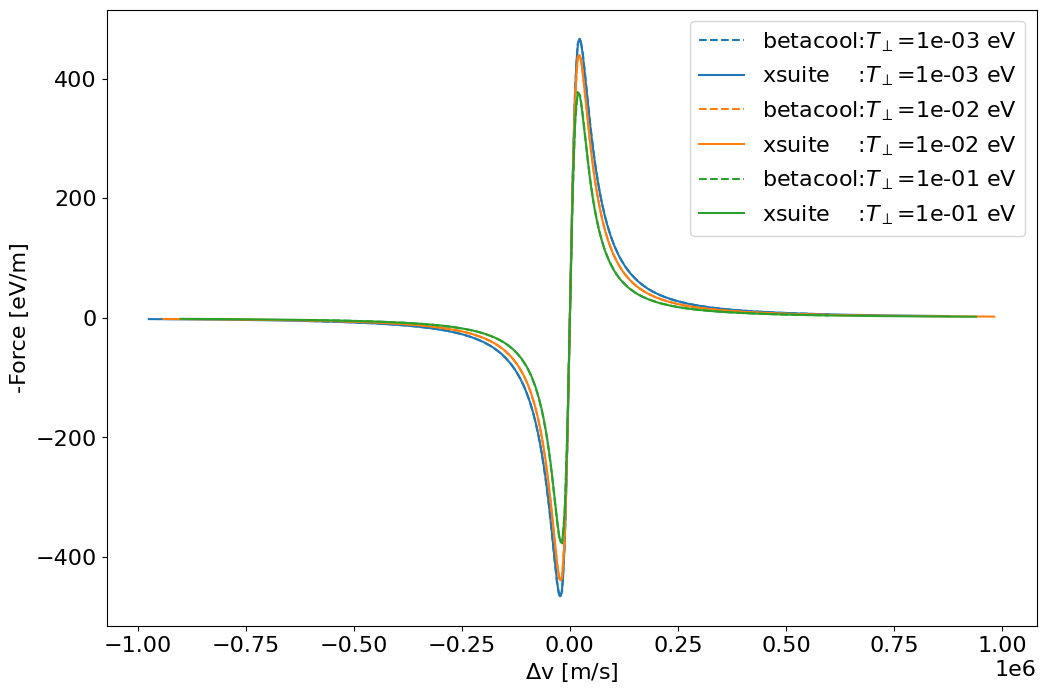

In [4]:
import numpy as np
import matplotlib.pyplot as plt

T_perp_list = [0.001,0.01,0.1] # eV

def load_data(module,T_perp):
    filename = f"results/force_{module}_T_perp={T_perp:.0e}.npz"
    data = np.load(filename)
    v_diff = data['v_diff']
    force = data['force']
    return v_diff,force

cmap = plt.get_cmap("tab10")
plt.figure(figsize=(12, 8))
plt.rcParams.update({'font.size': 16})

for i,T_l in enumerate(T_perp_list):
    v_diff,force = load_data('betacool',T_l)
    plt.plot(v_diff, -force, label=f'betacool:$T_\perp$={T_l:.0e} eV',color=cmap(i),linestyle='--')
    v_diff,force= load_data('xsuite',T_l)
    plt.plot(v_diff, -force, label=f'xsuite    :$T_\perp$={T_l:.0e} eV',color=cmap(i))

plt.xlabel('$\Delta$v [m/s]')
plt.ylabel('-Force [eV/m]')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.legend()
# plt.xlim([0,3e5])
# plt.axis(ymin = 0)
plt.savefig('force_temperature_transverse.png', dpi=300)
plt.savefig('force_temperature_transverse.eps', dpi=300)
plt.show()